## 1. Oasis Infobyte Data Science Internship Task 4: Email Spam Detection with Machine Learning

# 2. Load the Required Modules.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


# 3. Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 4.Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


From above we can see unnamed 2, unnamed 3, unnamed 4 are NA. so we can drop them.

In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# we can drop unnamed 2, unnamed 3, unnamed 4
df. drop(columns= ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

We can see there are repaeted duplicate values. we can remove duplicates.

In [ ]:
# duplicates
df[df.duplicated]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
#Removing duplicates
df = df.drop_duplicates()
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Analyze after basic clean of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
# description
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
# unique values
df.nunique()

v1       2
v2    5169
dtype: int64

In [ ]:
# balanced or imbalanced dataset
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [ ]:
# null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

# 5. Data Visualization

## 5a. Univariate analysis

<Axes: xlabel='v1', ylabel='count'>

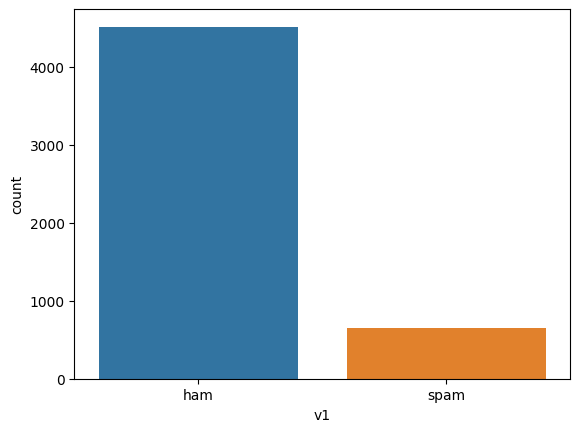

In [ ]:
# we have only v1 as categorical so we can use countplot for frequency
sns.countplot(data= df, x='v1')

As we can see from above data set we can see spam has very less spam emails.

# 5b. Label Encoding

In [ ]:
# converting v1 into numerical from categorical
le = LabelEncoder()
df['v1']= le.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 6. ML Model Training

In [ ]:
# X and y features
X= df['v2']
y=df['v1']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=20)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3618,), (1551,), (3618,), (1551,))

## Converting Text into Numerical using TF-IDF vectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

extract = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# train and test into numerical

X_train_feat = extract.fit_transform(X_train)
X_test_feat = extract.transform(X_test)

# Convert the target values into 0 and 1

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
print(X_train_feat)

  (0, 126)	0.2983103910080664
  (0, 5514)	0.21471021944679222
  (0, 5717)	0.1738056088858908
  (0, 570)	0.2983103910080664
  (0, 5777)	0.2983103910080664
  (0, 5304)	0.16237651146240972
  (0, 6559)	0.37342088461034834
  (0, 289)	0.2266043027233539
  (0, 6562)	0.23900318348166047
  (0, 5773)	0.26216718622400614
  (0, 5112)	0.46456939953291787
  (0, 2612)	0.31286767658994
  (1, 507)	0.2670733576448444
  (1, 1395)	0.23082904350254885
  (1, 47)	0.2575824394068099
  (1, 3989)	0.22133812526451438
  (1, 6255)	0.2273530951019297
  (1, 224)	0.1971237507970494
  (1, 3946)	0.193384924539626
  (1, 4254)	0.2575824394068099
  (1, 1837)	0.2670733576448444
  (1, 463)	0.195829820387682
  (1, 4059)	0.2442057414546794
  (1, 244)	0.23082904350254885
  (1, 5030)	0.23912015691995606
  :	:
  (3612, 4050)	0.16421267117905194
  (3612, 6646)	0.2371162247199483
  (3613, 6757)	0.6411985246232499
  (3613, 1606)	0.7673750400038873
  (3614, 6531)	0.36607200466984385
  (3614, 4614)	0.7321440093396877
  (3614, 4616)	0

# 8. Training with Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_feat,y_train)

LogisticRegression()

In [ ]:
y_pred= lr.predict(X_test_feat)
print("Logistic Regression Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Logistic Regression Accuracy score 95.42230818826563
[[1347   70]
 [   1  133]]
R-Squared value :  0.5975756822733186


Accuracy score of 95%

# 9. Training with Decision tree Classification

In [ ]:
dc = DecisionTreeClassifier(random_state=0)
dc.fit(X_train_feat,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred= lr.predict(X_test_feat)
print("Decision tree Classification Accuracy score", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_pred,y_test))
print("R-Squared value : ", r2_score(y_test,y_pred))

Decision tree Classification Accuracy score 95.42230818826563
[[1347   70]
 [   1  133]]
R-Squared value :  0.5975756822733186


# 10. Conclusion

We can observe that both the ML algorithms have given acuracy rate of 95%. That is a good accuracy rate for spam email detection.